<a href="https://colab.research.google.com/github/Pradeep1070/Titanic_survival_prediction./blob/main/Titanic_survival_prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
# from sklearn.svc import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive/')#MSc/DS

Mounted at /content/drive/


# Load data

In [14]:
titanic_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MSc/DS/Titanic/train.csv')

In [15]:
titanic_train.shape

(891, 12)

In [16]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
catergorical = titanic_train.dtypes[titanic_train.dtypes == 'object'].index
titanic_train[catergorical].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [21]:
titanic_train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

# delete unwanted cols

In [22]:
del titanic_train['PassengerId']
del titanic_train['Ticket']

# Transform

tranform categorical data in integer to pd categorical

In [23]:
print(titanic_train['Survived'].dtype)
# print(titanic_train['Survived'].describe())

sr1 = pd.Categorical(titanic_train['Survived'])

print(sr1.dtype)
print(sr1.describe())

int64
category
            counts     freqs
categories                  
0              549  0.616162
1              342  0.383838


In [24]:
titanic_train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

survived to categorical

In [26]:
sr1 = pd.Categorical(titanic_train['Survived'])
print(sr1.describe())

sr1 = sr1.rename_categories(['died','survived'])
titanic_train['Survived'] = sr1

print(sr1.describe())
print(titanic_train['Survived'].cat.categories)

            counts     freqs
categories                  
0              549  0.616162
1              342  0.383838
            counts     freqs
categories                  
died           549  0.616162
survived       342  0.383838
Index(['died', 'survived'], dtype='object')


pclass to cat

In [27]:
print(titanic_train['Pclass'].describe()) #int values given for what should be ordered categorcial variables

sr2 = pd.Categorical(titanic_train['Pclass'], ordered=True)
# sr2 = sr2.rename_categories(['class1','class2','class3'])
titanic_train['Pclass'] = sr2
print(sr2.describe())

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
            counts     freqs
categories                  
1              216  0.242424
2              184  0.206510
3              491  0.551066


cabin to cat

Cabin can be useful because of location but its data needs to be transfomred


In [28]:
titanic_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [29]:
titanic_train['Cabin'].dtype

dtype('O')

In [30]:
cabin_char = (titanic_train['Cabin']).astype(str) #object type should be converted to str ptherwise you get an error
new_cabin = np.array([char[0] for char in cabin_char]) #take first letter
new_cabin = pd.Categorical(new_cabin)
titanic_train['Cabin'] = new_cabin
new_cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


sex to cat

In [31]:
new_sex = pd.Categorical(titanic_train['Sex'])
print(new_sex.describe())
titanic_train['Sex'] = new_sex

            counts     freqs
categories                  
female         314  0.352413
male           577  0.647587


#Missing Values

In [32]:
missing = np.where(titanic_train['Age'].isnull() == True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888]),)

check  if the column aproximates a normal distribution to fill missing vals with mean

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

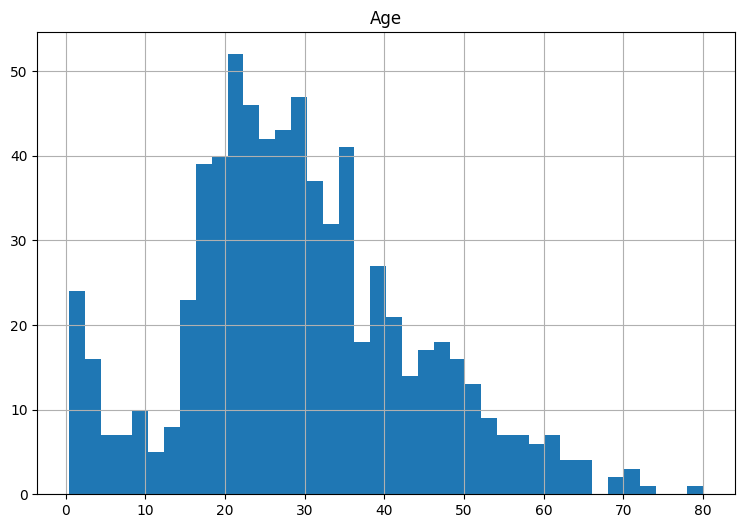

In [33]:
titanic_train.hist(column='Age', figsize=(9,6), bins=40)

4 ways to fill missing vals:

1). fill with 0s

2). remove missing val rows and analyze 2 separate sets

3). fill with mean/mode (mean - after checking whether distribution approimates normal dist)

4). fill with an imute function - approximate a value based on other col values of the row

fill age missing vals with median 28

In [34]:
titanic_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
tmpAge = np.where(titanic_train['Age'].isnull(), #logical check
                 28,                    #val if check is true
                 titanic_train['Age'],  #val if check is false
                 )
titanic_train['Age'] = tmpAge
titanic_train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

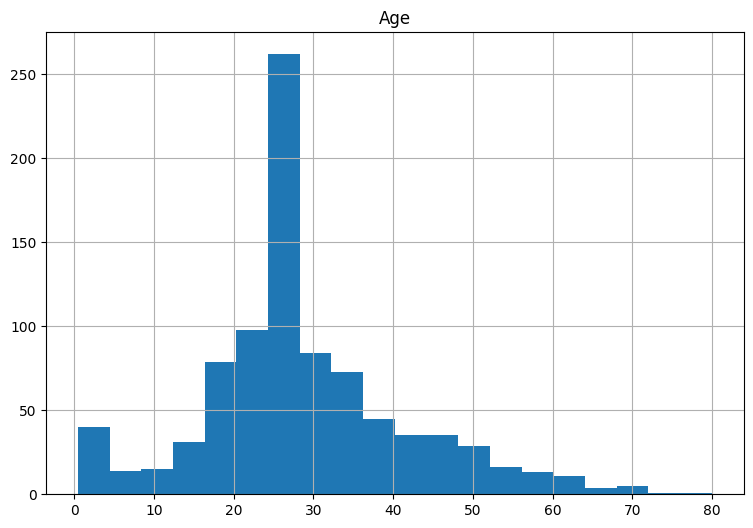

In [36]:
titanic_train.hist(column='Age', figsize=(9,6), bins=20)

# Train test split

In [ ]:
titanic_train_copy = titanic_train.copy()

In [ ]:
del titanic_train_copy['Name']

In [ ]:
X = titanic_train_copy.iloc[:, 1:]
# or
# X = titanic_train.drop(columns=['Survived'])
y = titanic_train_copy['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=55)